## **Regression: Decision Tree**

### **Learning objectives**
- Be able to preprocess data for machine learning

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load and read our processed dataset
df = pd.read_csv("../data/immoweb_data_processed.csv")

,Price,Type_of_Property,Number_of_Rooms,Living_Area,Fully_Equipped_Kitchen,Terrace,Garden,Surface_area_plot_of_land,Number_of_Facades,Swimming_Pool,...,LOFT,MANOR_HOUSE,MANSION,MIXED_USE_BUILDING,OTHER_PROPERTY,PENTHOUSE,SERVICE_FLAT,TOWN_HOUSE,TRIPLEX,VILLA
Price,1.000000,-0.025793,0.327378,0.433501,0.287574,0.156315,0.039679,0.102217,0.080382,0.036304,...,0.063357,0.023250,0.055416,-0.004580,0.001824,0.149280,-0.031790,0.028024,0.025654,0.125042
Type_of_Property,-0.025793,1.000000,-0.570642,-0.596723,0.108579,0.121025,-0.374403,-0.722153,-0.367445,-0.011522,...,0.057256,-0.009211,-0.063239,-0.141038,-0.015954,0.128163,0.079296,-0.109473,0.050901,-0.129766
Number_of_Rooms,0.327378,-0.570642,1.000000,0.718805,0.004941,0.026337,0.243342,0.461847,0.243484,0.004799,...,-0.031135,0.014057,0.068712,0.035044,0.008653,-0.022729,-0.133046,0.068602,0.038920,0.102943
Living_Area,0.433501,-0.596723,0.718805,1.000000,0.035275,0.017058,0.227931,0.531552,0.278986,0.020757,...,0.057526,0.014788,0.091315,0.122360,0.012577,0.000620,-0.095312,0.097624,0.029822,0.137537
Fully_Equipped_Kitchen,0.287574,0.108579,0.004941,0.035275,1.000000,0.150268,0.009316,-0.056402,-0.017059,0.019336,...,0.036784,-0.003698,0.002332,-0.042645,-0.006405,0.079921,0.006646,0.022280,0.010748,0.029745
Terrace,0.156315,0.121025,0.026337,0.017058,0.150268,1.000000,0.053052,-0.060237,-0.009137,0.024776,...,0.013372,0.005483,-0.005091,-0.058634,0.009497,0.085353,-0.007969,-0.022490,0.011570,0.004265
Garden,0.039679,-0.374403,0.243342,0.227931,0.009316,0.053052,1.000000,0.315758,0.120949,0.034739,...,-0.010817,0.016030,0.022232,-0.006947,0.016195,-0.063606,-0.031333,0.052712,-0.007188,0.064500
Surface_area_plot_of_land,0.102217,-0.722153,0.461847,0.531552,-0.056402,-0.060237,0.315758,1.000000,0.490231,0.046808,...,-0.041348,-0.005041,0.017855,0.042799,-0.000784,-0.092553,-0.057264,0.051794,-0.036759,0.247021
Number_of_Facades,0.080382,-0.367445,0.243484,0.278986,-0.017059,-0.009137,0.120949,0.490231,1.000000,0.046219,...,-0.010063,0.018554,-0.012145,-0.044346,0.011457,-0.011419,-0.044603,-0.036940,-0.017478,0.241656
Swimming_Pool,0.036304,-0.011522,0.004799,0.020757,0.019336,0.024776,0.034739,0.046808,0.046219,1.000000,...,0.006484,-0.000664,-0.004560,-0.010170,-0.001150,0.004074,0.027055,0.016929,-0.004843,0.032677


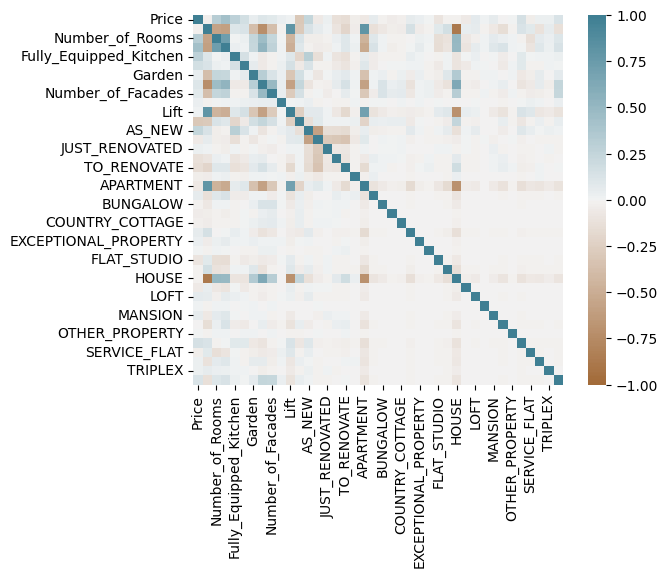

In [ ]:
# Check correlation of variabales with the coor() method and visialize by seaborn heatmap
corr = df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(40, 220, n=200),
    square=True,
)
corr

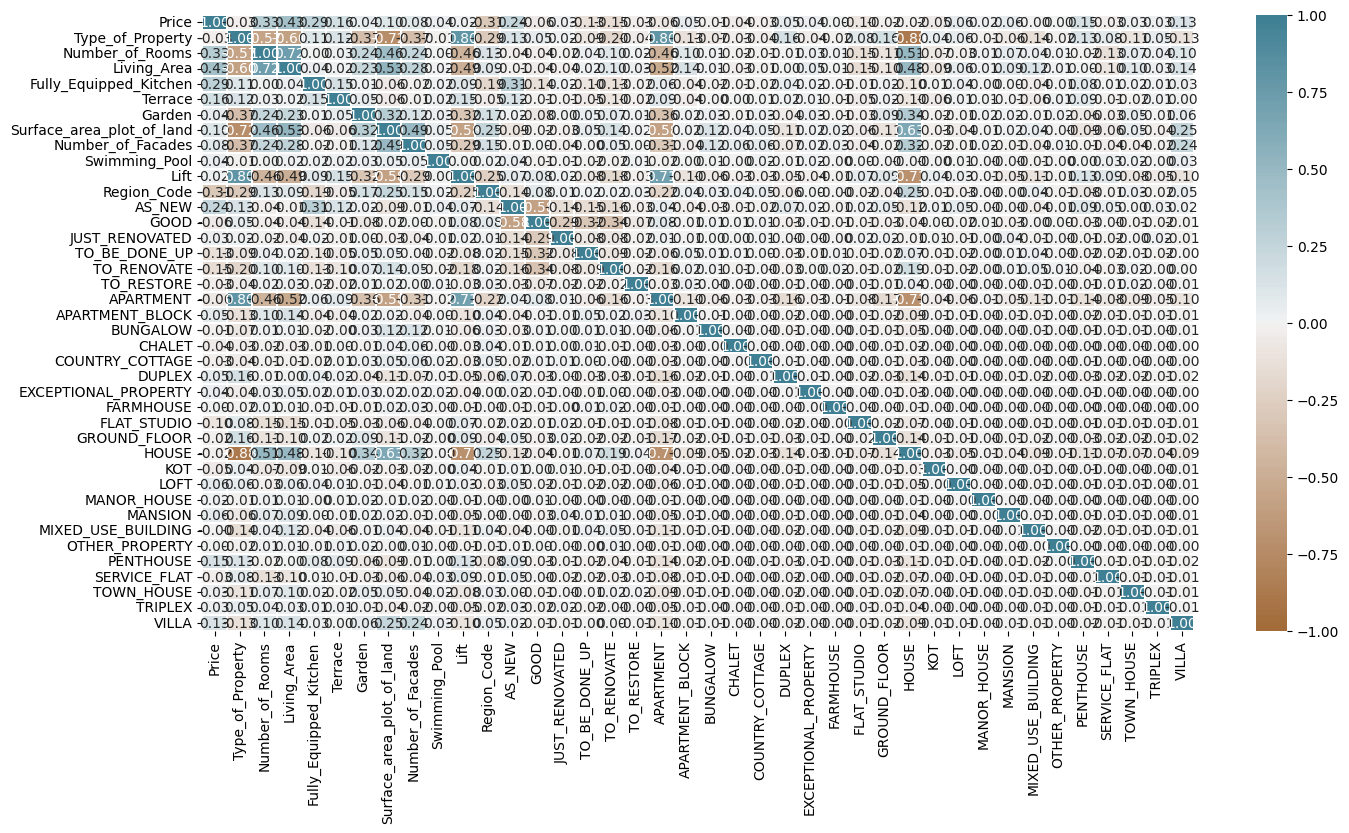

In [ ]:
# Check correlation of variabales with the coor() method and visialize by seaborn heatmap
plt.subplots(figsize=(16, 8))
sns.heatmap(
    df.corr(),
    annot=True,
    linewidths=0.05,
    fmt=".2f",
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(40, 220, n=200),
)

plt.show()

## **Decision Tree**

The main steps in the 1st Model with the general evaluations r2, mse, rmse, mae:
- Import required libraries;
- Select features (X) and target (y) - I put all features separately to try different group of them to find the best group;
- Split the data into training and testing sets - I want to try two test_size: 0.22 or 0.33;
- Create and train the Decision Tree model;
- Evaluate the model;
- Display the results

R² Score: 0.36041596837416723
Mean Squared Error (MSE): 14018524590.981222
Root Mean Squared Error (RMSE): 118399.85046857627
Mean Absolute Error (MAE): 86860.86971330237


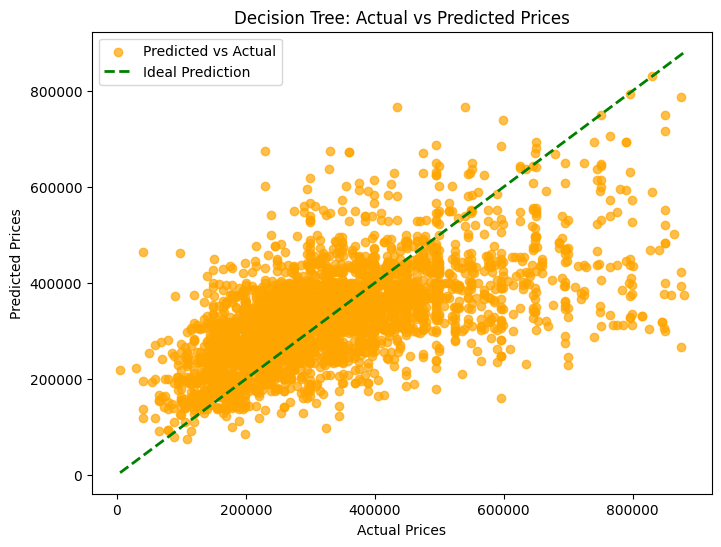

In [29]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the required columns
# Select features (X) and target (y)
X = df[["Type_of_Property", "Living_Area", "Region_Code"]]
y = df["Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=42
)

# Create and train the Decision Tree model
tr_regressor = DecisionTreeRegressor(random_state=42)
tr_regressor.fit(X_train, y_train)

# Predict using the trained model
pred_tr = tr_regressor.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, pred_tr)
mse = mean_squared_error(y_test, pred_tr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, pred_tr)

# Display the results
print("R² Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

# Optionally, plot actual vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_tr, color="orange", alpha=0.7, label="Predicted vs Actual")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "g--",
    lw=2,
    label="Ideal Prediction",
)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree: Actual vs Predicted Prices")
plt.legend()
plt.show()

### **Summary:**
The 1st Model of Decision Tree is suboptimal for the following reasons:

The low R² score (0.36) suggests the model explains only one third portion of the variability in Price.  
The test-size 0.22 gives better result.  
The high RMSE and MAE values indicate significant prediction errors, making the model unsuitable for accurate price predictions.  
**Potential Issues:**  
**Data Quality:** there may be outliers or noise in the data (e.g., extreme Price values) that affect model performance.  
**Model Complexity:** the Decision Tree model might be overfitting or underfitting due to inappropriate parameter settings.  

Separated results of the into Train and Test:
The main steps in **the 2st Model:**
- Import required libraries;
- Select features (X) and target (y) - I put all features separately to try different group of them to find the best group;
- Split the data into training and testing sets - I want to try two test_size: 0.22 or 0.33;
- Create and train the Decision Tree model;
- Evaluate the model;
- Display the results;
- Optionally, plot actual vs predicted prices

Training Set Performance:
R² Score: 0.4008308954956502
Mean Squared Error (MSE): 13586370074.765347
Root Mean Squared Error (RMSE): 116560.58542562896
Mean Absolute Error (MAE): 85129.25865953413

Testing Set Performance:
R² Score: 0.33678910980036536
Mean Squared Error (MSE): 14536382576.088398
Root Mean Squared Error (RMSE): 120566.92156677302
Mean Absolute Error (MAE): 89331.29758142405


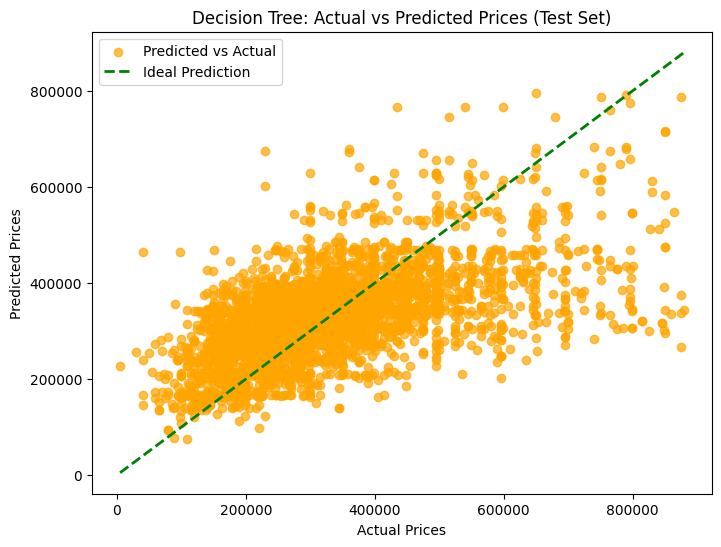

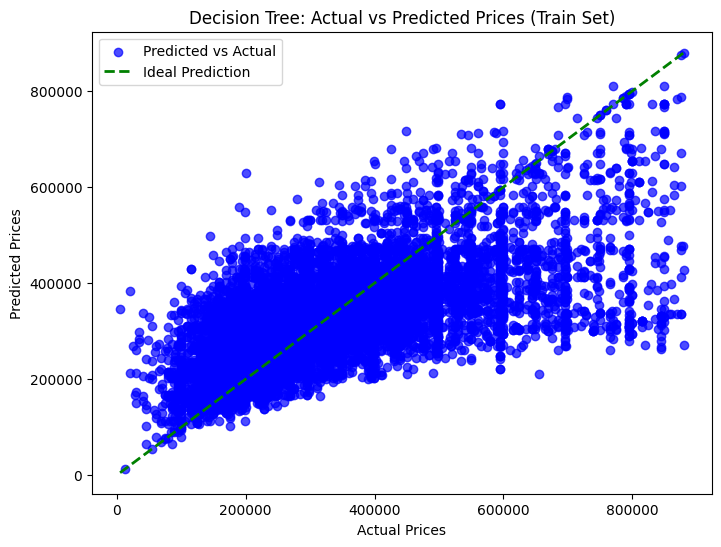

In [ ]:
# Import required libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the required columns
# Select features (X) and target (y)
X = df[["Type_of_Property", "Living_Area", "Region_Code"]]
y = df["Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.22, random_state=42
)

# Create and train the Decision Tree model
tr_regressor = DecisionTreeRegressor(random_state=42)
tr_regressor.fit(X_train, y_train)

# Predict using the trained model
pred_train = tr_regressor.predict(X_train)
pred_test = tr_regressor.predict(X_test)

# Evaluate the model on the training set
r2_train = r2_score(y_train, pred_train)
mse_train = mean_squared_error(y_train, pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, pred_train)

# Evaluate the model on the testing set
r2_test = r2_score(y_test, pred_test)
mse_test = mean_squared_error(y_test, pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, pred_test)

# Display the results
print("Training Set Performance:")
print("R² Score:", r2_train)
print("Mean Squared Error (MSE):", mse_train)
print("Root Mean Squared Error (RMSE):", rmse_train)
print("Mean Absolute Error (MAE):", mae_train)

print("\nTesting Set Performance:")
print("R² Score:", r2_test)
print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)

# Optionally, plot actual vs predicted prices for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred_test, color="orange", alpha=0.7, label="Predicted vs Actual")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    "g--",
    lw=2,
    label="Ideal Prediction",
)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree: Actual vs Predicted Prices (Test Set)")
plt.legend()
plt.show()

# Optionally, plot actual vs predicted prices for the train set
plt.figure(figsize=(8, 6))
plt.scatter(y_train, pred_train, color="blue", alpha=0.7, label="Predicted vs Actual")
plt.plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    "g--",
    lw=2,
    label="Ideal Prediction",
)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Decision Tree: Actual vs Predicted Prices (Train Set)")
plt.legend()
plt.show()

### **Summary:**
As a result we can see the same evaluation in the 2nd Model of Decision Tree:

The low R² score (0.36) suggests the model explains only one third portion of the variability in Price.  
The test-size 0.22 gives better result.  
The high RMSE and MAE values indicate significant prediction errors, making the model unsuitable for accurate price predictions.  
**Potential Issues:**  
**Data Quality:** there may be outliers or noise in the data (e.g., extreme Price values) that affect model performance.  
**Model Complexity:** the Decision Tree model might be overfitting or underfitting due to inappropriate parameter settings. 

We can use hyperparameter tuning for my Decision Tree Regressor to improve performance. This involves using GridSearchCV to find the best combination of parameters for my model.

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import pandas as pd

# Define the parameter grid for hyperparameter tuning
param_grid = {
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 10, 20, 50],
    "min_samples_leaf": [1, 5, 10, 20],
    "max_features": [None, "sqrt", "log2"],
}

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt, param_grid=param_grid, scoring="r2", cv=5, verbose=1, n_jobs=-1
)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Best parameters from the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator for predictions
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the model
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(f"Training R²: {r2_train}")
print(f"Testing R²: {r2_test}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 50}
Training R²: 0.41798353474263383
Testing R²: 0.40149797716772984


**Explanation of Results:**  
1. Hyperparameter Tuning Outcome:  
- Best Parameters: The grid search identified the optimal parameters for the Decision Tree Regressor:  
    - max_depth = 10: Limits the depth of the tree, reducing complexity and overfitting.  
    - max_features = 'sqrt': Uses the square root of the total features when determining splits, improving efficiency and robustness.  
    - min_samples_leaf = 20: Ensures at least 20 samples in a leaf node, reducing overfitting by preventing overly specific splits.  
    - min_samples_split = 50: Requires at least 50 samples to consider a split, controlling over-splitting of the data.  

2. Model Performance:  
- Training R²: 0.4179: Indicates the model explains ~41.8% of the variance in training data. It is less overfit than before, as the training R² has decreased slightly.  
- Testing R²: 0.4015: Indicates the model explains ~40.1% of the variance in unseen (testing) data, which is an improvement from the untuned model.  

**Key Observations:**  
- The improvement in testing R² shows better generalization, indicating reduced overfitting.  
- However, the overall R² is still moderate (~40%), suggesting the features in the dataset may not fully capture the complexity of predicting Price. Adding more informative features or using advanced models (e.g., Random Forest) could yield further improvements.  

**Summary:**  
The tuned Decision Tree model has reduced overfitting and achieved a better balance between training and testing performance. While the model captures a moderate portion of the variability in property prices, further improvements could come from:  

- Adding better features,  
- Exploring ensemble methods like Random Forest,  
- Handling any remaining outliers or skewed data.  